# Traffic Sign Recognition Project
The goals / steps of this project are the following:
* Load the data set
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

In [32]:
# testing the and , or , not and xor function
import pandas as pd
import math

In [33]:
# setting the weights
theta0 = -30
theta1 = 0
theta2 = 20

In [34]:
test_inputs = [(0,0),(0,1),(1,0),(1,1)]
correct_outputs = [False, False, False, True]
output = []

In [35]:
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = theta1 * test_input[0] + theta2 * test_input[1] + theta0
    result = int(linear_combination >= 0)
    output.append(result)
    
print(output)

[0, 0, 0, 0]


In [39]:
math.exp(0)

1.0

In [44]:
# gradient descent for logistic regression

import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))
    
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5])

# Calculate one gradient descent step for each weight
# TODO: Calculate output of neural network
nn_output = sigmoid(np.dot(x, w))

# TODO: Calculate error of neural network
error = y-nn_output
error_term = error * sigmoid_prime(np.dot(x,w))
# TODO: Calculate change in weights
del_w = learnrate * error_term * x

print(sigmoid(2))

0.8807970779778823


In [ ]:
# Forward Propogation

import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network

hidden_layer_in =(np.dot(X,weights_input_to_hidden))
hidden_layer_out =sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out,weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

In [2]:
import tensorflow as tf

hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


## Tensor flow implementation of Epoch

In [3]:
import hashlib
import os
import pickle
from urllib.request import urlretrieve

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile

print('All modules imported.')

All modules imported.


In [4]:
def download(url, file):
    """
    Download file from <url>
    :param url: URL to file
    :param file: Local file path
    """
    if not os.path.isfile(file):
        print('Downloading ' + file + '...')
        urlretrieve(url, file)
        print('Download Finished')

# Download the training and test dataset.
download('https://s3.amazonaws.com/udacity-sdc/notMNIST_train.zip', 'notMNIST_train.zip')
download('https://s3.amazonaws.com/udacity-sdc/notMNIST_test.zip', 'notMNIST_test.zip')

# Make sure the files aren't corrupted
assert hashlib.md5(open('notMNIST_train.zip', 'rb').read()).hexdigest() == 'c8673b3f28f489e9cdf3a3d74e2ac8fa',\
        'notMNIST_train.zip file is corrupted.  Remove the file and try again.'
assert hashlib.md5(open('notMNIST_test.zip', 'rb').read()).hexdigest() == '5d3c7e653e63471c88df796156a9dfa9',\
        'notMNIST_test.zip file is corrupted.  Remove the file and try again.'

# Wait until you see that all files have been downloaded.
print('All files downloaded.')

Download Finished
Download Finished
All files downloaded.


In [5]:
def uncompress_features_labels(file):
    """
    Uncompress features and labels from a zip file
    :param file: The zip file to extract the data from
    """
    features = []
    labels = []

    with ZipFile(file) as zipf:
        # Progress Bar
        filenames_pbar = tqdm(zipf.namelist(), unit='files')
        
        # Get features and labels from all files
        for filename in filenames_pbar:
            # Check if the file is a directory
            if not filename.endswith('/'):
                with zipf.open(filename) as image_file:
                    image = Image.open(image_file)
                    image.load()
                    # Load image data as 1 dimensional array
                    # We're using float32 to save on memory space
                    feature = np.array(image, dtype=np.float32).flatten()

                # Get the the letter from the filename.  This is the letter of the image.
                label = os.path.split(filename)[1][0]

                features.append(feature)
                labels.append(label)
    return np.array(features), np.array(labels)

# Get the features and labels from the zip files
train_features, train_labels = uncompress_features_labels('notMNIST_train.zip')
test_features, test_labels = uncompress_features_labels('notMNIST_test.zip')

# Limit the amount of data to work with a docker container
docker_size_limit = 150000
train_features, train_labels = resample(train_features, train_labels, n_samples=docker_size_limit)

# Set flags for feature engineering.  This will prevent you from skipping an important step.
is_features_normal = False
is_labels_encod = False

# Wait until you see that all features and labels have been uncompressed.
print('All features and labels uncompressed.')

100%|███████████████████████████████████████████████████████████████████████| 10001/10001 [00:05<00:00, 1915.55files/s]


All features and labels uncompressed.


In [6]:
# Problem 1 - Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    return (0.1+((image_data*(0.9-0.1))/(255)))


### DON'T MODIFY ANYTHING BELOW ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])

if not is_features_normal:
    train_features = normalize_grayscale(train_features)
    test_features = normalize_grayscale(test_features)
    is_features_normal = True

print('Tests Passed!')

Tests Passed!


In [7]:
if not is_labels_encod:
    # Turn labels into numbers and apply One-Hot Encoding
    encoder = LabelBinarizer()
    encoder.fit(train_labels)
    train_labels = encoder.transform(train_labels)
    test_labels = encoder.transform(test_labels)

    # Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
    train_labels = train_labels.astype(np.float32)
    test_labels = test_labels.astype(np.float32)
    is_labels_encod = True

print('Labels One-Hot Encoded')

Labels One-Hot Encoded


In [8]:
assert is_features_normal, 'You skipped the step to normalize the features'
assert is_labels_encod, 'You skipped the step to One-Hot Encode the labels'

# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.05,
    random_state=832289)

print('Training features and labels randomized and split.')

Training features and labels randomized and split.


In [9]:
# Save the data for easy access
pickle_file = 'notMNIST.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('notMNIST.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': test_features,
                    'test_labels': test_labels,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


In [10]:
%matplotlib inline

# Load the modules
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reload the data
pickle_file = 'notMNIST.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  train_features = pickle_data['train_dataset']
  train_labels = pickle_data['train_labels']
  valid_features = pickle_data['valid_dataset']
  valid_labels = pickle_data['valid_labels']
  test_features = pickle_data['test_dataset']
  test_labels = pickle_data['test_labels']
  del pickle_data  # Free up memory


print('Data and modules loaded.')

Data and modules loaded.


In [15]:
features_count = 784
labels_count = 10

# TODO: Set the features and labels tensors
features = tf.placeholder(tf.float32,[None,features_count])
labels = tf.placeholder(tf.float32,[None,labels_count])

# TODO: Set the weights and biases tensors
weights = tf.Variable(tf.truncated_normal([features_count,labels_count]))
biases = tf.Variable(tf.zeros([labels_count]))

# Feed dicts for training, validation, and test session
train_feed_dict = {features: train_features, labels: train_labels}
valid_feed_dict = {features: valid_features, labels: valid_labels}
test_feed_dict = {features: test_features, labels: test_labels}

# Linear Function WX + b
logits = tf.matmul(features, weights) + biases

prediction = tf.nn.softmax(logits)

# Cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), axis=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

# Create an operation that initializes all variables
init = tf.global_variables_initializer()

In [16]:
# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

print('Accuracy function created.')

Accuracy function created.


Epoch  4/4: 100%|█████████████████████████████████████████████████████████████| 2850/2850 [01:20<00:00, 35.59batches/s]


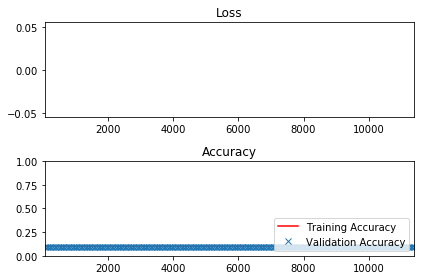

Validation accuracy at 0.09573332965373993


In [17]:
# TODO: Find the best parameters for each configuration
epochs = 4
batch_size = 50
learning_rate = 0.1



### DON'T MODIFY ANYTHING BELOW ###
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels})

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

In [18]:
# TODO: Set the epochs, batch_size, and learning_rate with the best parameters from problem 3
epochs = 4
batch_size = 50
learning_rate = 0.1



### DON'T MODIFY ANYTHING BELOW ###
# The accuracy measured against the test set
test_accuracy = 0.0

with tf.Session() as session:
    
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer
            _ = session.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

        # Check accuracy against Test data
        test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)


assert test_accuracy >= 0.80, 'Test accuracy at {}, should be equal to or greater than 0.80'.format(test_accuracy)
print('Nice Job! Test Accuracy is {}'.format(test_accuracy))

Epoch  4/4: 100%|████████████████████████████████████████████████████████████| 2850/2850 [00:05<00:00, 482.65batches/s]


Nice Job! Test Accuracy is 0.8607000112533569


In [ ]:
# RELU hidden layer

hidden_layer = tf.add(tf.matmul(features,hidden_weights),hidden_biases)
hidden_layer = tf.nn.relu(hidden_layer)

logits = tf.add(tf.matmul(hidden_layer,output_weights),output_biases)

In [ ]:
# Dropout logic

keep_prob=tf.placeholder(float32) # probability to keep units

#once hidden layer is calculated , perform dropout
hidden_layer = tf.nn.dropout(hidden_layer,keep_prob)
# keep_prob is normally 0.5 for the training set and 1.0 for the test and validation set
# after dropout is done, calculate the output or logits

In [ ]:
# Tensor flow convolution layer
k_output = 64

#image properties

image_height = 10
image_width = 10
color_channels = 3

# Convolution filter

filter_size_width = 5
filter_size_height = 5

input_image = tf.placeholder(tf.float32,shape=[None,image_height,image_width,color_channels])

# Weights and biases
weight = tf.Variable(tf.truncated_normal([filter_size_height, filter_size_width, color_channels, k_output]))
bias = tf.Variable(tf.zeros(k_output))

conv_layer = tf.nn.conv2d(input_image,weight,strides=[1,2,2,1],padding='SAME')
conv_layer = tf.nn.bias_add(conv_layer,bias)

# Apply activation function
conv_layer = tf.nn.relu(conv_layer)

In [ ]:
## applying a max pooling layer to the conv layer

conv_layer = tf.nn.max_pool(conv_layer,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
# k-size is filter size and strides is the stride step of the max pool layer represented
# in [batch,height,width,channels]

# creating a series of Convolutional networks

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# learning parameters
learning_rate = 0.05
epochs = 5
batch_size = 128

# number of samples to calculate validation accuracy
test_valid_size = 128

# Network parameters
n_classes = 10
dropout = 0.75

# Weights and biases
# out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
# out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))

weights = { 'wc1' : tf.Variable(tf.random_normal([5,5,1,32])),
            'wc2' : tf.Variable(tf.random_normal([5,5,32,64])),
            'wd1' : tf.Variable(tf.random_normal([7*7*64,1024])),
            'out' : tf.Variable(tf.random_normal([1024,n_classes]))
          }
biases = {  'wc1' : tf.Variable(tf.random_normal([32])),
            'wc2' : tf.Variable(tf.random_normal([64])),
            'wd1' : tf.Variable(tf.random_normal([1024])),
            'out' : tf.Variable(tf.random_normal([n_classes]))
         }

def conv2d(x,W,b,strides=1):
    x=tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='SAME')
    x=tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

def max_pool(x,k=2):
    x=tf.nn.max_pool(x,k_size=[1,k,k,1],strides=[1,k,k,1],padding='SAME')
    return x



In [ ]:
# In the code below, we're creating 3 layers alternating between convolutions and max pooling 
# followed by a fully connected and output layer. 

def conv_net(x,weights,biases,dropout):
    
    # Layer 1 - 28*28*1 image - 14*14*32
    conv1 = conv2d(x,weights['wc1'],biases['wc1'])
    conv1 = max_pool(conv1)
    
    # convolution layer 2 - 14*14*32 to 7*7*64
    conv2 = conv2d(conv1,weights['wc2'],biases['wc2'])
    conv2 = conv2d(conv2)
    
    # fully connected layer
    fc1 = tf.reshape(conv2,[-1,weights['wd1'].getshape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['wd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.droput(fc1,dropout)
    
    out = tf.add(tf.matmul(fc1,weights['out']),biases['out'])
    
    return out

In [ ]:
# Session

x = tf.placeholder(tf.float32,[None,28,28,1])
y = tf.placeholder(tf.float32,[None,n_classes])
keep_prob = tf.placeholder(tf.float32)

# create model
logits = convnet(x,weights,biases,keep_prob)

# define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y))
optimizer = tf.nn.Gradient_Descent_optimizer(learning_rate = learning_rate).minimize(cost)

# Accuracy
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variable_initilizer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_x,y:batch_y,keep_prob:dropout})
            
            loss = sess.run(cost,feed_dict = {x: batch_x,y: batch_y,keep_prob: 1})
            valid_acc = sess.run(accuracy, feed_dict={x: mnist.validation.images[:test_valid_size], 
                                                      y: mnist.validation.labels[:test_valid_size],
                                                      keep_prob: 1.})

            print('Epoch {:>2}, Batch {:>3} -'
                  'Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(epoch + 1,batch + 1,loss,valid_acc))
            
    # calculate test accuracy
    test_acc = sess.run(accuracy,feed_dict{x: mnist.validation.images[:test_valid_size],
                                           y: mnist.validation.labels[:test_valid_size],
                                           keep_prob: 1.})
    
    print('Testing Accuracy: {}'.format(test_acc))